<a href="https://colab.research.google.com/github/Sanjeeviit/Business-Analytics/blob/main/BAweek2_3_4_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MLR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('/content/05-MLR-correct.xlsx')
df.head()



,Unnamed: 0,Y,X1,X2,Unnamed: 4,Unnamed: 5,Unnamed: 6,GPA at college,Entrance exam,interview
0,record,GPA at college,Entrance exam,interview,NaN,NaN,GPA at college,1,0.74666,0.763283
1,1,9.5,9.8,9.1,NaN,NaN,Entrance exam,0.74666,1,0.540056
2,2,6.3,7.5,7.1,NaN,NaN,interview,0.763283,0.540056,1
3,3,8.2,7.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9.1,9.5,9.6,NaN,NaN,NaN,GPA at college,Entrance exam,interview


In [ ]:
df_2 = df[['Y','X1','X2']]
df_2.head()

,Y,X1,X2
0,GPA at college,Entrance exam,interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6


In [ ]:
df_2.drop([0]) # drop means drop row

,Y,X1,X2
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [ ]:
df_2.drop([0,16,17,18,19],inplace=True)

<ipython-input-15-807a7b36a596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop([0,16,17,18,19],inplace=True)


In [ ]:
df_2

,Y,X1,X2
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [ ]:
df_2 = df_2.rename(columns={'Y': 'GPA','X1':'Entrance','X2':'Interview'})
df_2

,GPA,Entrance,Interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5
6,8.32,8.5,8.4
7,9.6,7.54,9.5
8,7.6,8.4,7.8
9,6.5,5.6,7.8
10,8.64,8,8.5


In [ ]:
df_2.info() # we need to change to float to work on th ndata

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   GPA        15 non-null     object
 1   Entrance   15 non-null     object
 2   Interview  15 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [ ]:
df_2 = df_2.astype({'GPA':float,'Entrance':float,'Interview':float})
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GPA        15 non-null     float64
 1   Entrance   15 non-null     float64
 2   Interview  15 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [ ]:
df_2.head()

,GPA,Entrance,Interview
1,9.5,9.8,9.1
2,6.3,7.5,7.1
3,8.2,7.9,7.7
4,9.1,9.5,9.6
5,8.2,9.1,7.5


In [ ]:
df_2.shape

(15, 3)

In [ ]:
df_2 = df_2.reset_index(drop=True)
df_2

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


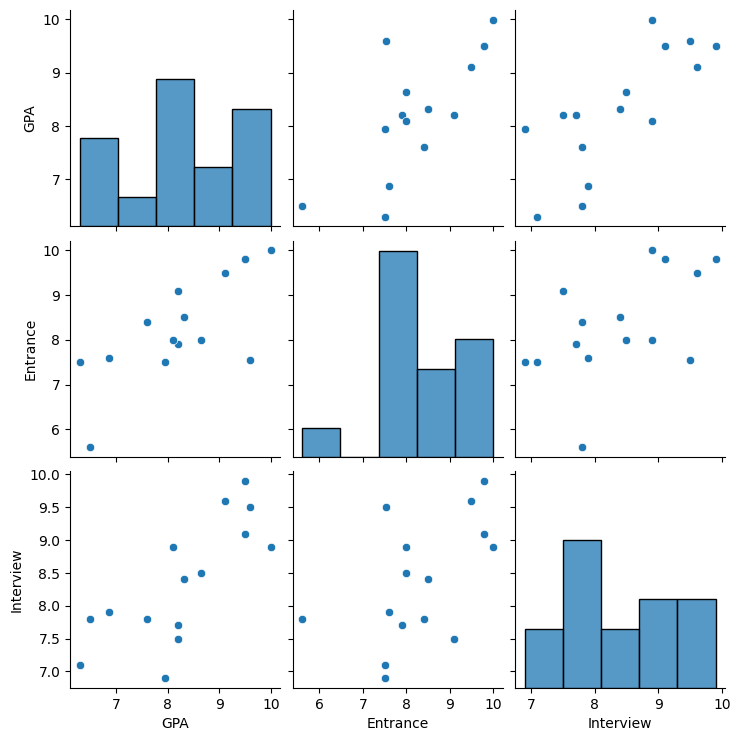

In [ ]:
import seaborn as sns
sns.pairplot(df_2)

In [ ]:
import statsmodels.api as sm
#import pandas.util.testing as tm
X = df_2[['Entrance','Interview']]
y = df_2['GPA']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     17.12
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           0.000305
Time:                        06:43:51   Log-Likelihood:                -12.591
No. Observations:                  15   AIC:                             31.18
Df Residuals:                      12   BIC:                             33.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7044      1.577     -0.447      0.663      -4.139       2.731
Entrance       0.4554      0.169      2.702      0.019       0.088       0.823
Interview      0.6225      0.214      2.909      0.013       0.156       1.089
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.870
Skew:                           0.275   Prob(JB):                        0.647
Kurtosis:                       1.956   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
[variance_inflation_factor(add_constant(df_2[['Entrance','Interview']]).values,i) for i in range (len(add_constant(df_2[['Entrance','Interview']]).columns))]

[95.05280153277468, 1.411751521644102, 1.4117515216441023]

In [ ]:
# residuals
'''
df4 = pd.DataFrame()
df4['Prediction'] = results2.fittedvalues.copy()
df4['Observed'] = df_2['GPA'].copy()
df4['Residual'] = df4['Observed'] - df4['Prediction']
df4 '''

NameError: name 'results2' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [ ]:
print(df_2.shape)

(15, 3)


In [ ]:
regmodel2 = LinearRegression()
regmodel2.fit(X,y)
print(regmodel2.coef_ )

[0.         0.45544232 0.62250322]


In [ ]:
regmodel2.intercept_

-0.7044019490596707

In [ ]:
df_2['Prediction'] = regmodel2.predict(X)
df_2

,GPA,Entrance,Interview,Prediction
0,9.50,9.80,9.1,9.423712
1,6.30,7.50,7.1,7.131188
2,8.20,7.90,7.7,7.686867
3,9.10,9.50,9.6,9.598331
4,8.20,9.10,7.5,8.108897
5,8.32,8.50,8.4,8.395885
6,9.60,7.54,9.5,8.643414
7,7.60,8.40,7.8,7.976839
8,6.50,5.60,7.8,6.701600
9,8.64,8.00,8.5,8.230414


In [ ]:
r2_score(y,df_2['Prediction'])

0.7405095141015078

In [ ]:
mean_squared_error(y,df_2['Prediction'])

0.31378235397832804

In [ ]:
rmsre = np.sqrt(mean_squared_error(y,df_2['Prediction']))
rmsre

0.560162792390148

In [ ]:
adjusted_rsquared = 1 - (1-r2_score(y,df_2['Prediction']))*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_rsquared

0.6697393815837371

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Given data
data = pd.read_excel('/content/gf_assigment_1.xlsx')
grouped_df = pd.DataFrame(data)

# Combine bins 8 and 10 into a single bin "8+"
grouped_df = grouped_df.groupby(grouped_df['obs'].apply(lambda x: 8 if x >= 8 else x)).sum().reset_index()

# Calculate the mean of the observed data
mu = grouped_df['Observed Frequency'].mean()

# Calculate the Poisson PMF for each bucket
grouped_df['POISSON'] = poisson.pmf(grouped_df['obs'], mu)

# Adjust the Poisson PMF for the "8+" bin
grouped_df.loc[grouped_df['obs'] == 8, 'POISSON'] = 1 - grouped_df.loc[grouped_df['obs'] < 8, 'POISSON'].sum()

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * total_observations

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'], ddof=2)

print(grouped_df)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


ValueError: cannot insert obs, already exists

assignment 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
df.shape

(120, 1)

In [ ]:
df.head()

,obs
0,4
1,3
2,8
3,7
4,4


<ipython-input-16-bb5403ff2955>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['obs'])


<Axes: xlabel='obs', ylabel='Density'>

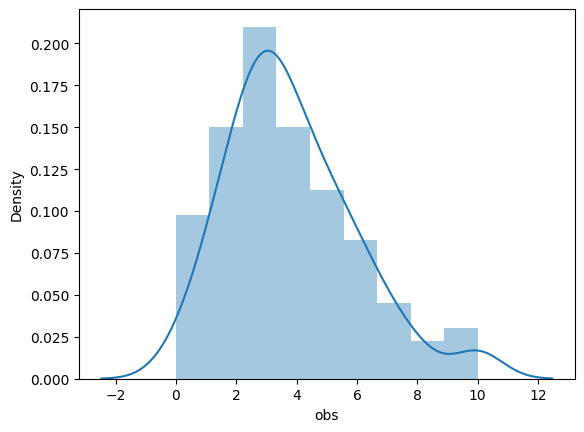

In [ ]:
sns.distplot(df['obs'])

<function matplotlib.pyplot.show(close=None, block=None)>

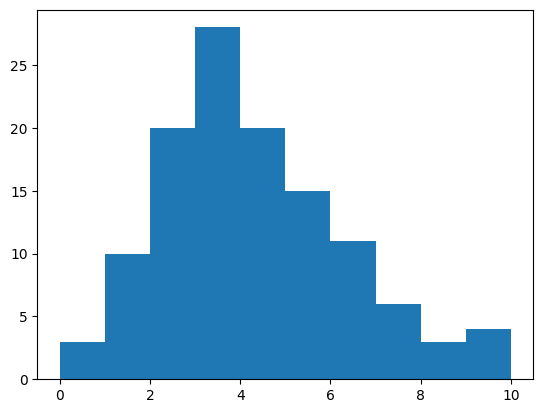

In [ ]:
plt.hist(df['obs'])
plt.show

In [ ]:
df.describe()

,obs
count,120.000000
mean,3.841667
std,2.145920
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,10.000000


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2


In [ ]:
stat_labels = ['Variance ','skewness','kurt']

stat_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stats.labels,stats.values)))

AttributeError: module 'scipy.stats' has no attribute 'labels'

In [ ]:
import scipy.stats as stats
stat_labels =['Variance Observed','Skewness Observed','Kurtosis Observed']
stat_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stat_labels,stat_values)))

{('Variance Observed', 4.604971988795519), ('Skewness Observed', 0.8057895151475443), ('Kurtosis Observed', 0.6998995067458327)}


In [ ]:
mu = df['obs'].mean()
mu

3.841666666666667

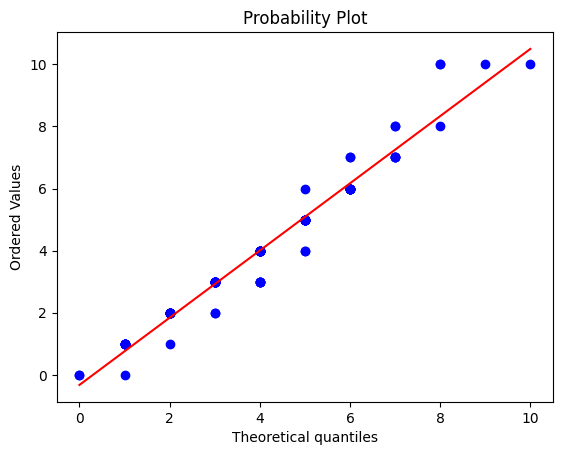

In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu), plot=plt)
plt.show()

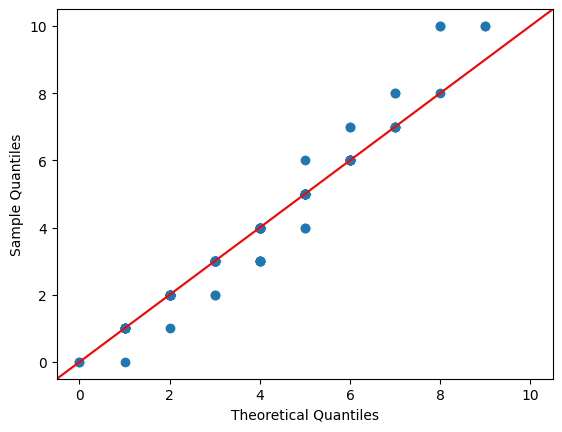

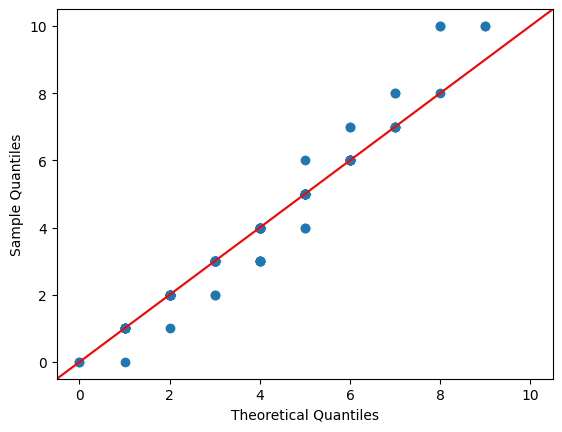

In [ ]:
sm.qqplot(df['obs'], stats.poisson(mu), line='45')

In [ ]:
df['Bins']= pd.cut(df['obs'],bins =5)
df

,obs,Bins
0,4,"(2.0, 4.0]"
1,3,"(2.0, 4.0]"
2,8,"(6.0, 8.0]"
3,7,"(6.0, 8.0]"
4,4,"(2.0, 4.0]"
...,...,...
115,5,"(4.0, 6.0]"
116,2,"(-0.01, 2.0]"
117,2,"(-0.01, 2.0]"
118,7,"(6.0, 8.0]"


In [ ]:
df_2= pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('Bins').count())
df_2

,Observed Frequency
Bins,
"(-0.01, 2.0]",33
"(2.0, 4.0]",48
"(4.0, 6.0]",26
"(6.0, 8.0]",9
"(8.0, 10.0]",4


In [ ]:
grouped_df =pd.DataFrame()
print(grouped_df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
grouped_df['Observed Frequency']= df.groupby('obs')['obs'].count()
grouped_df

,Observed Frequency
obs,
0,3
1,10
2,20
3,28
4,20
5,15
6,11
7,6
8,3


In [ ]:
grouped_df['POISSON']=poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

,Observed Frequency,POISSON
obs,,
0,3,0.021458
1,10,0.082434
2,20,0.158341
3,28,0.202765
4,20,0.194739
5,15,0.149624
6,11,0.095801
7,6,0.052577
8,3,0.025248


<function matplotlib.pyplot.show(close=None, block=None)>

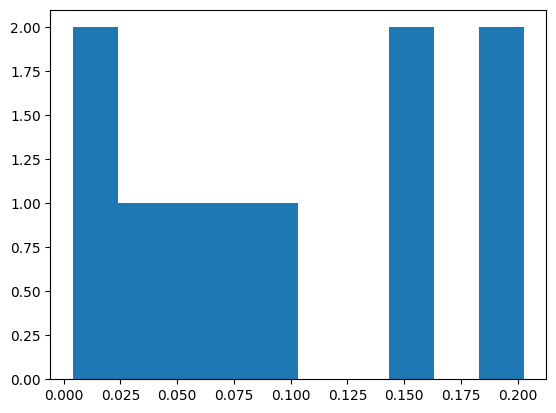

In [ ]:
plt.hist(grouped_df['POISSON'])
plt.show

In [ ]:
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * len(df)
grouped_df

,Observed Frequency,POISSON,Expected Frequency
obs,,,
0,3,0.021458,2.574937
1,10,0.082434,9.892050
2,20,0.158341,19.000979
3,28,0.202765,24.331809
4,20,0.194739,23.368675
5,15,0.149624,17.954932
6,11,0.095801,11.496144
7,6,0.052577,6.309193
8,3,0.025248,3.029727


In [ ]:
grouped_df["POISSON"] = grouped_df["POISSON"]/np.sum(grouped_df["POISSON"])
grouped_df

,Observed Frequency,POISSON,Expected Frequency
obs,,,
0,3,0.021738,2.574937
1,10,0.083509,9.892050
2,20,0.160406,19.000979
3,28,0.205409,24.331809
4,20,0.197278,23.368675
5,15,0.151576,17.954932
6,11,0.097051,11.496144
7,6,0.053262,6.309193
8,3,0.025577,3.029727


In [ ]:
print(grouped_df['Observed Frequency'].sum())

120


In [ ]:
print(grouped_df['Expected Frequency'].sum())

118.45526722966434


In [ ]:
print(grouped_df['Observed Frequency'].sum() - grouped_df['Expected Frequency'].sum())

1.5447327703356564


In [ ]:
print(grouped_df['POISSON'].sum())

0.9999999999999999


<function matplotlib.pyplot.show(close=None, block=None)>

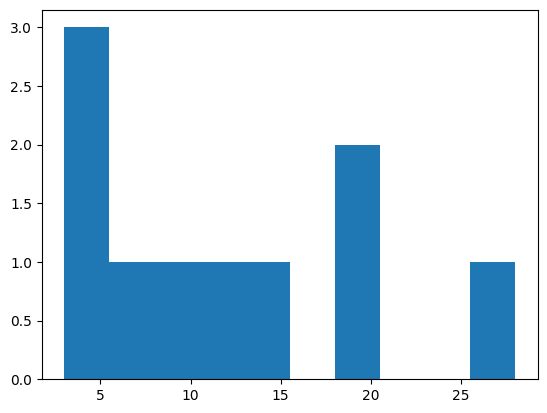

In [ ]:
plt.hist(grouped_df['Observed Frequency'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

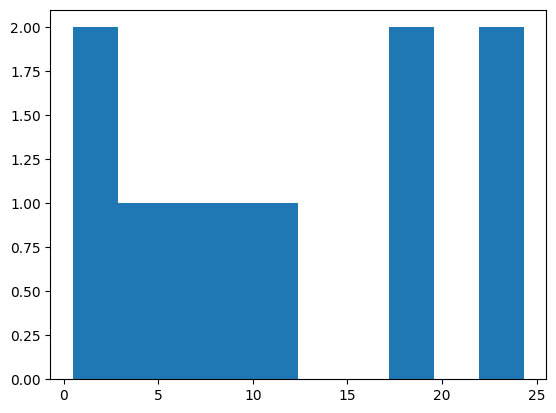

In [ ]:
plt.hist(grouped_df['Expected Frequency'])
plt.show

In [ ]:
print(len(df ))

120


In [ ]:
import scipy.stats as stats
prob_interval = [stats.norm.ppf(i*len(df),df['obs'].mean(),df['obs'].std()) for i in range(1,8)]
prob_interval

[nan, nan, nan, nan, nan, nan, nan]

In [ ]:
prob_interval = [stats.norm.ppf(i*len(grouped_df),df['obs'].mean(),df['obs'].std()) for i in range(len(grouped_df))]
prob_interval

[-inf, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [ ]:
from scipy.stats import chi2_contingency

# Observed and expected frequencies
observed = [3, 10, 20, 28, 20, 15, 11, 6, 3, 4]
expected = [2.5749, 9.8920, 19.0009, 24.3318, 23.3686, 17.9549, 11.4961, 6.3091, 3.0297, 0.4968]

# Reshape data for chi2_contingency (if your data is structured differently, adjust accordingly)
data = np.array([observed]).reshape(1, -1)  # Reshape for chi2_contingency

# Chi-square test
chi2, pval, degrees_of_freedom, expected_freqs = chi2_contingency(data, expected)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", pval)
print("Degrees of freedom:", degrees_of_freedom)


Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0


In [ ]:
def calculate_pmf(data, pmf_function):
  """
  Calculates the probability mass function (PMF) for each data point.

  Args:
      data: List of data values.
      pmf_function: Function that takes a data point and returns its PMF.

  Returns:
      pmf: List of PMF values corresponding to the data points.
  """
  pmf = []
  for value in data:
    pmf.append(pmf_function(value))

  # Calculate PMF for the last bucket (rest of the space)
  total_pmf = sum(pmf)
  pmf[-1] = 1 - total_pmf  # Update PMF for the last bucket (rest)

  return pmf

# Example usage (replace with your specific PMF function)
def poisson_pmf(value, lambda_param):
  # Replace with your implementation of the Poisson PMF function
  # This is a placeholder for illustration
  return 0.0  # Placeholder value

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pmf = calculate_pmf(data, poisson_pmf)  # Replace with your actual PMF function

# Calculate expected frequency for the last bucket
expected_frequency = pmf[-1] * len(data)  # Number of data points * PMF of last bucket

# Print results
print("PMF:", pmf)
print("Expected frequency for the last bucket (NEFLB):", expected_frequency)


TypeError: poisson_pmf() missing 1 required positional argument: 'lambda_param'

In [ ]:
def calculate_pmf(data, pmf_function):
  """
  Calculates the probability mass function (PMF) for each data point.

  Args:
      data: List of data values.
      pmf_function: Function that takes a data point and returns its PMF.

  Returns:
      pmf: List of PMF values corresponding to the data points.
  """
  # Group the data into bins
  data = grouped_df
  pmf = []
  for value in data:
    pmf.extend(pmf_function(value))

  # Calculate PMF for the last bucket (rest of the space)
  total_pmf = sum(pmf)
  pmf[-1] = 1 - total_pmf  # Update PMF for the last bucket (rest)

  return pmf

# Example usage (replace with your specific PMF function)
def poisson_pmf(value, lambda_param):
  # Replace with your implementation of the Poisson PMF function
  # This is a placeholder for illustration
  return 0.0  # Placeholder value

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pmf = calculate_pmf(data, poisson_pmf)  # Replace with your actual PMF function

# Calculate expected frequency for the last bucket
expected_frequency = pmf[-1] * len(data)  # Number of data points * PMF of last bucket

# Print results
print("PMF:", pmf)
print("Expected frequency for the last bucket (NEFLB):", expected_frequency)


In [ ]:
import scipy.stats as stats

# Your observed and expected frequencies
observed = [3, 10, 20, 28, 20, 15, 11, 6, 3, 4]
expected = [2.57, 9.89, 19.00, 24.33, 23.37, 17.95, 11.50, 0.0, 3.03, 0.50]

# Adjust expected frequencies to sum to the total of observed frequencies
adjustment_factor = sum(observed) / sum(expected)
adjusted_expected = [e * adjustment_factor for e in expected]

# Perform the chi-square test
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=adjusted_expected)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: inf, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [ ]:
import scipy.stats as stats
import pandas as pd

# Your observed and expected frequencies
observed = [3, 10, 20, 28, 20, 15, 11, 6, 3, 4]
expected = [2.57, 9.89, 19.00, 24.33, 23.37, 17.95, 11.50, 0.0, 3.03, 0.50]

# Adjust expected frequencies to sum to the total of observed frequencies
adjustment_factor = sum(observed) / sum(expected)
adjusted_expected = [e * adjustment_factor for e in expected]

# Perform the chi-square test
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=adjusted_expected)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: inf, p-value: 0.0


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/GOF_24t2_3xlsx.xlsx'
df = pd.read_excel(file_path)

# Display the columns and first few rows to understand the structure of the dataframe
print(df.columns)
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/GOF_24t2_3xlsx.xlsx'

In [ ]:
import pandas as pd
from scipy.stats import chisquare

# Load the data
file_path = '/content/GOF_24t2_3xlsx.xlsx'
df = pd.read_excel(file_path)

# Display the columns and first few rows to understand the structure of the dataframe
print(df.columns)
print(df.head())

# Assuming the dataframe has the columns 'obs', 'Observed Frequency', and 'POISSON'

# Calculate the expected frequencies
total_observations = df['Observed Frequency'].sum()
df['Expected Frequency'] = df['POISSON'] * total_observations

# Perform the chi-square test
chi2_stat, p_val = chisquare(df['Observed Frequency'], df['Expected Frequency'], ddof=2)

# Output the result
print(df)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/GOF_24t2_3xlsx.xlsx'
df = pd.read_excel(file_path)
from scipy.stats import poisson, chisquare

# Load the data

#df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')

# Inspect the first few rows of the dataframe to understand its structure
print(df.head())

# Calculate the mean of the observed data
mu = df['obs'].mean()

# Create a new column 'obs_grouped' to group the bins
df['obs_grouped'] = df['obs'].apply(lambda x: 8 if x >= 8 else x)

# Group by the 'obs_grouped' column to sum the observed frequencies
grouped_df = df.groupby('obs_grouped').sum().reset_index()

# Calculate the Poisson PMF for each bin
grouped_df['POISSON'] = poisson.pmf(grouped_df['obs_grouped'], mu)

# Adjust the Poisson PMF for the "8+" bin
grouped_df.loc[grouped_df['obs_grouped'] == 8, 'POISSON'] = 1 - grouped_df.loc[grouped_df['obs_grouped'] < 8, 'POISSON'].sum()

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * total_observations

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'], ddof=2)

# Output the result
print(grouped_df)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Given data
data = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
grouped_df = pd.DataFrame(data)

# Combine bins 8 and 10 into a single bin "8+"
grouped_df = grouped_df.groupby(grouped_df['obs'].apply(lambda x: 8 if x >= 8 else x)).sum().reset_index()

# Calculate the mean of the observed data
mu = grouped_df['Observed Frequency'].mean()

# Calculate the Poisson PMF for each bucket
grouped_df['POISSON'] = poisson.pmf(grouped_df['obs'], mu)

# Adjust the Poisson PMF for the "8+" bin
grouped_df.loc[grouped_df['obs'] == 8, 'POISSON'] = 1 - grouped_df.loc[grouped_df['obs'] < 8, 'POISSON'].sum()

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * total_observations

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'], ddof=2)

print(grouped_df)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
df

In [ ]:
sns.distplot(df['obs'])

In [ ]:
import scipy.stats as stats
stat_labels =['Variance Observed','Skewness Observed','Kurtosis Observed']
stat_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stat_labels,stat_values)))

In [ ]:
df.describe()

In [ ]:
import sklearn.metrics as metrics
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2


In [ ]:
df['Bins']= pd.cut(df['obs'],bins =10)
df

In [ ]:
mu = df['obs'].mean()
mu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Sample data for demonstration
data = df
df2 = pd.DataFrame(data)

# Calculate the mean
mu = df2['obs'].mean()

# Create QQ plot
sm.qqplot(df2['obs'], stats.poisson(mu), line='45')

# Show the plot
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu), plot=plt)
plt.show()

In [ ]:
df

H0; Data Follows poisoon distribution p<alpha reject,x2 tab < x2 computed reject

In [ ]:
df_2= pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('Bins').count())
df_2

Expected frequency poisson distrbution bins are to be  discreet like 1,2 3,

In [ ]:
grouped_df =pd.DataFrame()
print(grouped_df)


In [ ]:
grouped_df['Observed Frequency']= df.groupby('obs')['obs'].count()
grouped_df

PMF

In [ ]:
grouped_df['POISSON']=poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * len(df)
grouped_df


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Given data
data = {
    'obs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10],
    'Observed Frequency': [3, 10, 20, 28, 20, 15, 11, 6, 3, 4]
}
grouped_df = pd.DataFrame(data)

# Combine bins 8 and 10 into a single bin "8+"
grouped_df['obs_grouped'] = grouped_df['obs'].apply(lambda x: 8 if x >= 8 else x)
grouped_df_1 = grouped_df.groupby('obs_grouped').sum().reset_index()

# Calculate the mean of the observed data
mu = grouped_df_1['Observed Frequency'].mean()
print(mu)
# Calculate the Poisson PMF for each bucket
grouped_df_1['POISSON'] = poisson.pmf(grouped_df_1['obs_grouped'], mu)
#print(grouped_df_1)
# Adjust the Poisson PMF for the "8+" bin
grouped_df_1.loc[grouped_df_1['obs_grouped'] == 8, 'POISSON'] = 1 - grouped_df_1.loc[grouped_df_1['obs_grouped'] < 8, 'POISSON'].sum()

# Calculate the expected frequencies
total_observations = grouped_df_1['Observed Frequency'].sum()
grouped_df_1['Expected Frequency'] = grouped_df_1['POISSON'] * total_observations
print(grouped_df_1)
# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df_1['Observed Frequency'], grouped_df_1['Expected Frequency'], ddof=2)

#print(grouped_df_1)
#print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
grouped_df_1 = grouped_df.groupby(grouped_df['obs'].apply(lambda x: 8 if x >= 8 else x)).sum().reset_index()
grouped_df_1

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Given data
data = df

grouped_df = pd.DataFrame(data)

# Combine bins 8 and 10 into a single bin "8+"
grouped_df = grouped_df.groupby(grouped_df['obs'].apply(lambda x: 8 if x >= 8 else x)).sum().reset_index()

# Calculate the mean of the observed data
mu = grouped_df['Observed Frequency'].mean()

# Calculate the Poisson PMF for each bucket
grouped_df['POISSON'] = poisson.pmf(grouped_df['obs'], mu)

# Adjust the Poisson PMF for the "8+" bin
grouped_df.loc[grouped_df['obs'] == 8, 'POISSON'] = 1 - grouped_df.loc[grouped_df['obs'] < 8, 'POISSON'].sum()

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * total_observations

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'], ddof=2)

print(grouped_df)
print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")



In [ ]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Expected Frequency'],ddof=2)

In [ ]:
print(grouped_df['Observed Frequency'].sum())
print(grouped_df['Expected Frequency'].sum())

In [ ]:
print(grouped_df['POISSON'].sum())


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Load your dataset
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')

# Group the data by 'obs' and count the occurrences
grouped_df = df['obs'].value_counts().reset_index()
grouped_df.columns = ['obs', 'Observed Frequency']
grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Add missing bins if necessary (assuming data goes from 0 to 14)
for i in range(15):
    if i not in grouped_df['obs'].values:
        new_row = pd.DataFrame({'obs': [i], 'Observed Frequency': [0]})
        grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Modify the "15" bin to "15+"
if 15 not in grouped_df['obs'].values:
    new_row = pd.DataFrame({'obs': [15], 'Observed Frequency': [0]})
    grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

# Calculate the mean of the observed data
mu = df['obs'].mean()

# Calculate the Poisson PMF for each bucket from 0 to 14
buckets = np.arange(15)
poisson_pmf = poisson.pmf(buckets, mu)

# Calculate the PMF for the "15+" bin
poisson_pmf_15_plus = 1 - np.sum(poisson_pmf)

# Add the "15+" bin to the PMF array
poisson_pmf = np.append(poisson_pmf, poisson_pmf_15_plus)

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
expected_frequencies = poisson_pmf * total_observations

# Update the 'Expected Frequency' column in the dataframe
grouped_df['Expected Frequency'] = expected_frequencies

# Calculate the adjustment factor (ensure total sums match)
adjustment_factor = total_observations / grouped_df['Expected Frequency'].sum()
grouped_df['Adjusted Expected Frequency'] = grouped_df['Expected Frequency'] * adjustment_factor

print(grouped_df)

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Adjusted Expected Frequency'], ddof=2)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Load your dataset
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')

# Group the data by 'obs' and count the occurrences
grouped_df = df['obs'].value_counts().reset_index()
grouped_df.columns = ['obs', 'Observed Frequency']
grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Add missing bins if necessary (assuming data goes from 0 to 14)
for i in range(12):
    if i not in grouped_df['obs'].values:
        new_row = pd.DataFrame({'obs': [i], 'Observed Frequency': [0]})
        grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Modify the "15" bin to "12+"
if 15 not in grouped_df['obs'].values:
    new_row = pd.DataFrame({'obs': [11], 'Observed Frequency': [0]})
    grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

# Calculate the mean of the observed data
mu = df['obs'].mean()

# Calculate the Poisson PMF for each bucket from 0 to 14
buckets = np.arange(15)
poisson_pmf = poisson.pmf(buckets, mu)

# Calculate the PMF for the "15+" bin
poisson_pmf_15_plus = 1 - np.sum(poisson_pmf)

# Add the "15+" bin to the PMF array
poisson_pmf = np.append(poisson_pmf, poisson_pmf_15_plus)

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
expected_frequencies = poisson_pmf * total_observations

# Update the 'Expected Frequency' column in the dataframe
grouped_df['Expected Frequency'] = expected_frequencies

# Calculate the adjustment factor (ensure total sums match)
adjustment_factor = total_observations / grouped_df['Expected Frequency'].sum()
grouped_df['Adjusted Expected Frequency'] = grouped_df['Expected Frequency'] * adjustment_factor

print(grouped_df)

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Adjusted Expected Frequency'], ddof=2)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Poisson

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Poisson.xlsx')
df.head(10)

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
sns.distplot(df['obs'])

In [ ]:
stat_labels =['Variance Observed','Skewness Observed','Kurtosis Observed']
stat_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stat_labels,stat_values)))

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
mu = df['obs'].mean()
mu

In [ ]:
df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Sample data for demonstration
data = df
df2 = pd.DataFrame(data)

# Calculate the mean
mu = df2['obs'].mean()

# Create QQ plot
sm.qqplot(df2['obs'], stats.poisson(mu), line='45')

# Show the plot
plt.show()


In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu,), plot=plt)
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="uniform", plot=plt)
plt.show()

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm,uniform,poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2,chisquare


In [ ]:
df['Bins']= pd.cut(df['obs'],bins =10)
df

In [ ]:
df3 = pd.DataFrame()
df3['Observed Frequency']= (df.groupby('Bins').count())
df3

In [ ]:
grouped_df =pd.DataFrame()
print(grouped_df)

In [ ]:
grouped_df['Observed Frequency']= df.groupby('obs')['obs'].count()
grouped_df

In [ ]:
grouped_df['POISSON']=poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency'] = grouped_df['POISSON'] * len(df)
grouped_df

In [ ]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Expected Frequency'],ddof=2)

In [ ]:
import pandas as pd
from scipy.stats import chisquare

# Assuming grouped_df is already defined with columns 'Observed Frequency' and 'Expected Frequency'
observed_sum = grouped_df['Observed Frequency'].sum()
expected_sum = grouped_df['Expected Frequency'].sum()

# Calculate the adjustment factor
adjustment_factor = observed_sum / expected_sum

# Adjust the expected frequencies
grouped_df['Adjusted Expected Frequency'] = grouped_df['Expected Frequency'] * adjustment_factor

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Adjusted Expected Frequency'], ddof=1)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


In [ ]:
grouped_df['Adjusted Expected Frequency'] = grouped_df['Expected Frequency'] * adjustment_factor
grouped_df

In [ ]:
df5 = pd.DataFrame()
df5['Observed Frequency']= (df.groupby('Expected Frequency').sum())
df5

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

# Load your dataset
df = pd.read_excel('/content/data_Poisson.xlsx')

# Group the data by 'obs' and count the occurrences
grouped_df = df['obs'].value_counts().reset_index()
grouped_df.columns = ['obs', 'Observed Frequency']
grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Add missing bins if necessary (assuming data goes from 0 to 15+)
for i in range(11):
    if i not in grouped_df['obs'].values:
        new_row = pd.DataFrame({'obs': [i], 'Observed Frequency': [0]})
        grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

grouped_df = grouped_df.sort_values('obs').reset_index(drop=True)

# Add the '15+' bin
if 11 not in grouped_df['obs'].values:
    new_row = pd.DataFrame({'obs': [15], 'Observed Frequency': [0]})
    grouped_df = pd.concat([grouped_df, new_row], ignore_index=True)

# Calculate the mean of the observed data
mu = df['obs'].mean()

# Calculate the Poisson PMF for each bucket from 0 to 14
buckets = np.arange(11)
poisson_pmf = poisson.pmf(buckets, mu)

# Calculate the PMF for the "11+" bin
poisson_pmf_11_plus = 1 - np.sum(poisson_pmf)

# Add the "11+" bin to the PMF array
poisson_pmf = np.append(poisson_pmf, poisson_pmf_11_plus)

# Calculate the expected frequencies
total_observations = grouped_df['Observed Frequency'].sum()
expected_frequencies = poisson_pmf * total_observations

# Update the 'Expected Frequency' column in the dataframe
grouped_df['Expected Frequency'] = expected_frequencies

# Calculate the adjustment factor (ensure total sums match)
adjustment_factor = total_observations / grouped_df['Expected Frequency'].sum()
grouped_df['Adjusted Expected Frequency'] = grouped_df['Expected Frequency'] * adjustment_factor

print(grouped_df)

# Perform the chi-square test
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Adjusted Expected Frequency'], ddof=2)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Uniform

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Uniform.xlsx')
df.head(10)

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
df.describe()

In [ ]:
stat_labels =['Variance Observed','Skewness Observed','Kurtosis Observed']
stat_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stat_labels,stat_values)))

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2

In [ ]:
sm.qqplot(df['obs'],stats.uniform, fit=True,line='45')
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="uniform", plot=plt)
plt.show()

In [ ]:
'''import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2

mu = df['obs'].mean()
# Pass mu directly to the poisson distribution
sm.qqplot(df['obs'], stats.poisson, loc=0, scale=1, mu=mu, line='45')
plt.show() '''

In [ ]:
# H0 = the given sample from population follows uniform distribution qq plot for tails pp plot for middle

In [ ]:
df['Bins']= pd.cut(df['obs'], bins =10)
df.head()

In [ ]:
df.shape

In [ ]:
df2 = pd.DataFrame()
df2['Observed Frequency']= (df.groupby('Bins').count())
df2

In [ ]:
mean = df2['Observed Frequency'].mean()
df2['Expected Frequency']=mean
df2

In [ ]:
chisquare(df2['Observed Frequency'],df2['Expected Frequency'],ddof=2)


In [ ]:
chi2.ppf(0.95,len(df2)-2-1)

MLR Tutorial week 6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/05-MLR-correct.xlsx')
df.head(10)

In [ ]:
df.tail(10)

In [ ]:
df2 = df[['Y','X1','X2']]
df2.tail()

In [ ]:
df2.head()

In [ ]:
df2 = df2.drop(df2.index[0])
df2

In [ ]:
# Reset the index after dropping rows to ensure the index is sequential
df2 = df2.reset_index(drop=True)

# Now you can drop rows by their new indices if they exist
df2 = df2.drop([17,18,19,20], errors='ignore') # 'ignore' will suppress the KeyError if any of these indices don't exist
df2

In [ ]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview'},inplace = True)
df2

In [ ]:
df2.info()

In [ ]:
df2 = df2.astype(float)
df2

In [ ]:
df2.shape

In [ ]:
df2 =df2.reset_index()
df2

In [ ]:
df2.head()

In [ ]:
df2 = df2[['GPA','Entrance','Interview']]
df2

In [ ]:
import seaborn as sns
sns.pairplot(df2)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df2[['Entrance','Interview']])
y = df2['GPA']
model = sm.OLS(y,X).fit()
model.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

In [ ]:
df4 = pd.DataFrame()
df4['Prediction']= model.predict(X)
df4['Actual']= y
df4

In [ ]:
df4['Residual'] = df4['Actual'] - df4['Prediction']
df4

In [ ]:
import numpy as np

y_true = df4['Actual']
y_pred = df4['Prediction']
# Calculate residuals
residuals = [y_true[i] - y_pred[i] for i in range(len(y_true))]

# Square the residuals
squared_residuals = [r**2 for r in residuals]

# Mean of squared residuals
mean_squared_residuals = np.mean(squared_residuals)

# Root mean square residual
rmsr = np.sqrt(mean_squared_residuals)

print("RMSR:", rmsr)

Using SKLEARN

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
X = df2[['Entrance','Interview']]
y = df2['GPA']
reg = linear_model.LinearRegression()
reg.fit(X,y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
# Predict values
y_pred = reg.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(r2)

In [ ]:
adjusted_rsquared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_rsquared

In [ ]:
len(y)

In [ ]:
X.shape[1]

In [ ]:
df2.rename(columns={'Y':'GPA','X1':'Entrance','X2':'Interview '},inplace=True)
df2.head()

In [ ]:
df2.drop([0])
df2.shape

In [ ]:
df2.info()

In [ ]:
# Rename the columns to remove spaces and special characters
df2 = df2.astype(float)


[week 5 assignment, Chi squared test of Independence

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/iitm_onlineDegree.csv')
from scipy import stats
from scipy.stats import poisson,uniform,chi2
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df.head(10)

In [ ]:
df.shape[:]

In [ ]:
df.describe()

In [ ]:
contingTab = pd.crosstab(df.Gender,df.Preference, margins=True) # observed frency

In [ ]:
contingTab

Expecetd frequency

In [ ]:
contingTab.iloc[:-1,:-1]

In [ ]:
contingTab['Business']

In [ ]:
contingTab['All']['All']

In [ ]:
contingTab.transpose()

In [ ]:
Females = list(df['Gender'].unique())
Males =list(df['Preference'].unique())
exp1 ={}

for i in Females:
  exp2 ={}
  for j in Males:
    exp2[j]=contingTab.transpose()[i]['All']*contingTab[j]['All'] /contingTab['All']['All']
    exp1[i]=exp2


In [ ]:
exp1 # expected frequency

In [ ]:
314*433/732


In [ ]:
chisquareCal =0
for i in Females:
  for j in Males:
    #chisquareCal += (contingTab.transpose()[i][j] - exp1[i][j])**2/exp1[i][j]
    val = (contingTab.transpose()[i][j] - exp1[i][j])**2/exp1[i][j]
    chisquareCal += val

In [ ]:
chisquareCal

In [ ]:
# dof
dof = (len(Females)-1)*(len(Males)-1)
dof

In [ ]:
stats.chi2.ppf(0.95,dof)

In [ ]:
# since x2 computed is < x2 tab do not reject
# pvalue = 0.26 alpha = 0.05 since p value is not less than alpha do not reject

In [ ]:
contab = np.array([contingTab.transpose()['Female'][0:3].values,
                   contingTab.transpose()['Male'][0:3].values])
stats.chi2_contingency(contab)

In [ ]:
1-stats.chi2.cdf(chisquareCal,dof)

In [ ]:
df.Gender['Female']

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/GOF_24t2_3xlsx.xlsx'
df = pd.read_excel(file_path)

# Check the unique values in the "obs" column
unique_values = df['obs'].unique()
print("Unique values in 'obs' column:", unique_values)


In [ ]:
mean_scratches = df['obs'].mean()

print("Expected number of scratches on a car:", mean_scratches)


In [ ]:
# Calculate Mean, Median, and Mode
mean_scratches = df['obs'].mean()
median_scratches = df['obs'].median()
mode_scratches = df['obs'].mode()[0]

# Print the values
print("Mean:", mean_scratches)
print("Median:", median_scratches)
print("Mode:", mode_scratches)

# Visualization
plt.hist(df['obs'], bins=10, edgecolor='k', alpha=0.7)
plt.axvline(mean_scratches, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_scratches, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_scratches, color='b', linestyle='dashed', linewidth=1, label='Mode')
plt.legend()
plt.title('Histogram of Scratches')
plt.xlabel('Number of Scratches')
plt.ylabel('Frequency')
plt.show()


In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

Kurtosis < 3: The distribution has lighter tails and a flatter peak than the normal distribution (platykurtic).observed variance is approximately 4.6, which provides a measure of how much the number of scratches varies in your dataset.Skewness < 0: The distribution is negatively skewed (left-skewed), meaning the left tail is longer or fatter than the right.

In [ ]:
# qq plot for tails pp plots for the middle sec
import statsmodels.api as sm
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2
mu = df['obs'].mean()
sm.qqplot(df['obs'],stats.poisson(mu,), line='45')
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu,), plot=plt)
plt.show()

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
grouped_df =pd.DataFrame()
grouped_df

In [ ]:
grouped_df['Poisson_PMF']= poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency']= grouped_df['Poisson_PMF']*len(df)
grouped_df

In [ ]:
observed_sum = grouped_df['Observed Frequency'].sum()
expected_sum = grouped_df['Expected Frequency'].sum()
print("Observed Sum:", observed_sum)
print("Expected Sum:", expected_sum)

GOF Poisson week 2 tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/GOF_24t2_3xlsx.xlsx')
df.head(10)

In [ ]:
df.shape[:]

In [ ]:
df.describe()

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
# qq plot for tails pp plots for the middle sec
import statsmodels.api as sm
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2
mu = df['obs'].mean()
sm.qqplot(df['obs'],stats.poisson(mu,), line='45')
plt.show()


In [ ]:
stats.probplot(df['obs'], dist="poisson",sparams=(mu,), plot=plt)
plt.show()

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df_2 = pd.DataFrame()
df_2['Observed Frequency']= (df.groupby('bins').count())
df_2

In [ ]:
grouped_df =pd.DataFrame()
grouped_df

In [ ]:
grouped_df['Observed Frequency'] = df.groupby('obs')['obs'].count()
grouped_df

In [ ]:
grouped_df['Poisson_PMF']= poisson.pmf(k=grouped_df.index,mu=df['obs'].mean())
grouped_df

In [ ]:
grouped_df['Expected Frequency']= grouped_df['Poisson_PMF']*len(df)
grouped_df

In [ ]:
observed_sum = grouped_df['Observed Frequency'].sum()
expected_sum = grouped_df['Expected Frequency'].sum()
print("Observed Sum:", observed_sum)
print("Expected Sum:", expected_sum)

In [ ]:
scaling_factor = observed_sum / expected_sum
grouped_df['Scaled Expected Frequency'] = grouped_df['Expected Frequency'] * scaling_factor

In [ ]:
# Scale the expected frequencies
scaling_factor = observed_sum / expected_sum
grouped_df['Scaled Expected Frequency'] = grouped_df['Expected Frequency'] * scaling_factor

# Perform the Chi-Square test using the scaled expected frequencies
chi2_stat, p_val = chisquare(grouped_df['Observed Frequency'], grouped_df['Scaled Expected Frequency'], ddof=1)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

In [ ]:
chisquare(grouped_df['Observed Frequency'],grouped_df['Scaled Expected Frequency'],ddof=1)

In [ ]:
chi2.ppf(0.95,len(grouped_df)-1-1)

In [ ]:
print(len(grouped_df)-1-1)

week 5 assignment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Uniform.xlsx')
df.head(10)

In [ ]:
df.describe()

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
stats_labels = ['Variance Observed', 'Skewness Observed',  'Kurtosis Observed']
stats_values = [df['obs'].var(), df['obs'].skew(), df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm,uniform,poisson,chisquare,chi2,chi2_contingency

sm.qqplot(df['obs'],stats.uniform, fit=True, line='45')
plt.show()

In [ ]:
stats.probplot(df['obs'], dist="uniform", plot=plt)
plt.show()

In [ ]:
# estimate mu which is long term mean for poisson distribution
#mu = df['obs'].mean()

#sm.qqplot(df['obs'], stats.poisson(mu,), line='45')
#plt.show()

In [ ]:
#mu = df['obs'].mean()
#stats.probplot(df['obs'], dist='poisson',sparams=(mu,), plot=plt)
#plt.show()

In [ ]:
# Null hypothesis The given distribution follows uniform distribution
# H1 = hypothesis The given distribution do not follows uniform distribution
# Chi goodness of fit test

In [ ]:
df['bins']= pd.cut(df['obs'],10)
df.head()

In [ ]:
df2 = pd.DataFrame()
df2['Observed Frequency']= (df.groupby('bins').count())

df2

In [ ]:
mean = df2['Observed Frequency'].mean()
df2['Expected Frequency'] = mean
df2

In [ ]:
chisquare(df2['Observed Frequency'],df2['Expected Frequency'],ddof=2)

In [ ]:
# tabulated chi square value
chi2.ppf(0.95,len(df2)-2-1)

In [ ]:
# reject the null hypothesis if tabulated value is less than computed
# reject the null hypothesis if p value < significance

week 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Constant-elasticity.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Constant-elasticity.xlsx'

In [ ]:
df2 = df[['Price','Demand']]
df2.head()


In [ ]:
sns.regplot(x='Price',y='Demand',data=df2,fit_reg=False)

In [ ]:
plt.scatter(df2['Price'],df2['Demand'])
plt.show()

In [ ]:
print(df2.corr())
print(df2.cov())


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df2['Price'].values.reshape(-1,1),df2['Demand'])


In [ ]:
from operator import mod
print(model.intercept_)
print(model.coef_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(df2['Demand'],model.predict(df2['Price'].values.reshape(-1,1)))

In [ ]:
rho = df2['Price'].corr(df2['Demand'])
rho


In [ ]:
df2['naturalLogPrice'] = np.log(df2['Price'])
df2.head()

In [ ]:
df2['naturalLogDemand'] = np.log(df2['Demand'])
df2.head()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regmodel2 = linear_model.LinearRegression()

In [ ]:
regmodel2.fit(df2[['naturalLogPrice']],df2['naturalLogDemand'])

In [ ]:
print(regmodel2.intercept_)
print(regmodel2.coef_)

In [ ]:
rmse

week 4 SLimport data ,finding slr model  output

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/Hitters1.csv')
df.head()

In [ ]:
df.shape

X= df.iloc[:,0].values
Y= df.iloc[:,1].values

In [ ]:
X= df.iloc[:,0].values
y= df.iloc[:,1].values

In [ ]:
X,y

In [ ]:
plt.scatter (X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),y)

In [ ]:
# reshape your data using array .reshape (-1,1)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
# get r2 value

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,regressor.predict(X.reshape(-1,1)))


In [ ]:
y_pred = regressor.predict(X.reshape(-1,1))
y_pred

In [ ]:
# transfoming data


In [ ]:
y_new =np.sqrt(y)
y_new

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X.reshape(-1,1),y_new)

print(regressor1.intercept_)
print(regressor1.coef_)
r2_score(y_new,regressor1.predict(X.reshape(-1,1)))

In [ ]:
y_new1 =np.sqrt(y)
y_new1

In [ ]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X.reshape(-1,1), y_new1)

print(regressor2.intercept_)
print(regressor2.coef_)
r2_score(y_new,regressor2.predict(X.reshape(-1,1)))

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model_fit = LinearRegression()
model_fit.fit(X_train.reshape(-1,1),y_train)


In [ ]:
y_pred = model_fit.predict(X_test.reshape(-1,1))
y_pred

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
import numpy as np

# Example dataset
X = np.array([
    [-1, 1], [0, 1], [2, 1], [4, 1], [5, 1]
])

# Frequencies
frequencies = np.array([1, 1, 4, 2, 2])

# Expanding the dataset based on frequencies
X_expanded = np.repeat(X, frequencies, axis=0)

# Centering the data (subtracting the mean of each feature)
X_centered = X_expanded - X_expanded.mean(axis=0)

# Computing the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sorting eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Variance along the first principal component
variance_first_pc = sorted_eigenvalues[0]

print(f"Variance along the first principal component: {variance_first_pc:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta distribution
alpha, beta_param = 2, .2

# Define the x range
x = np.linspace(0, 1, 1000)

# Compute the Beta distribution
y = beta.pdf(x, alpha, beta_param)

# Plot the Beta distribution
plt.plot(x, y, 'b-', label=f'Beta({alpha}, {beta_param})')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.title(f'Beta Distribution with alpha={alpha} and beta={beta_param}')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters
alpha =-1
beta_param = -1

# Generate the x values
x = np.linspace(0, 1, 1000)

# Compute the Beta PDF values
y = beta.pdf(x, alpha, beta_param)

# Plot the Beta(1,1) distribution
plt.plot(x, y, label='Beta(3,7)', color='blue')
plt.fill_between(x, y, alpha=0.2, color='red')
plt.title('Beta(alpha,beta_param) Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


SKM import data SLR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/Hitters1.csv')
df.head()

In [ ]:
df.shape

fitting slr varaible x,y demand as y price as x

In [ ]:
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

In [ ]:
X,Y

In [ ]:
plt.scatter(X,Y )

In [ ]:
# reshape
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),Y)



In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y,regressor.predict(X.reshape(-1,1)))

In [ ]:
# prompt: transforming data

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)


In [ ]:
X,Y

In [ ]:
y_new = np.sqrt(Y)
y_new

In [ ]:
# train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
model_fit = LinearRegression()
model_fit.fit(X_train,Y_train)

In [ ]:
y_pred = model_fit.predict(X_test)
y_pred

In [ ]:
r2_score(Y_test,y_pred)

Descrptive stats  data visual tools ---- distribution creat the freq table observed and estimated value

In [ ]:
impoort numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/data_Uniform.xlsx')
df.head()

In [ ]:
df.shape

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
df.describe()

In [ ]:
stats_labels = ['variance observed','skewness','kurtosis']
stats_values = [df['obs'].var(),df['obs'].skew(),df['obs'].kurt()]
print(set(zip(stats_labels,stats_values)))

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import norm,uniform,poisson,chi2
from statsmodels.graphics.gofplots import qqplot
sm.qqplot(df['obs'],stats.uniform,fit-True,line = '45')
plt.show()

In [ ]:
stats.probplot(df['obs'],dist='uniform,plot = plt)
plt.show()

H0= the given data follows uniform distribution
H1= the given data does not follows uniform distribution

In [ ]:
df['bins'] = pd.cut(df['obs'],10)
df.head()

In [ ]:
df2 = pd.DataFrame()
#(df['bins'].value_counts())
df2.['Observed Frequency'] = df.groupby('bins')['obs'].count()
df2.head()

In [ ]:
mean =df2['Observed Frequency'].mean()
df2['Expected Frequency'] = mean
df2.head()

In [ ]:
chisquare(df2['Observed Frequency'],df2['Expected Frequency'])

In [ ]:
chi2.ppf(1-0.05,df2 = 7) # 10-2-1

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#import io
df2= pd.read_csv('/content/chiSquare.csv')

In [ ]:
df2.head()

In [ ]:
contingTab = pd.crosstab(df2.City,df2.Brand,margins =True)

In [ ]:
contingTab

expected frequency

In [ ]:
contingTab['A']

In [ ]:
contingTab['A']['Chennai']

In [ ]:
contingTab['All']['All']

In [ ]:
cities = list(df2['City'].unique())
brands = list(df2['Brand'].unique())

exp1 = {}

for i in cities :
  exp2 = {}
  for j in brands :
    exp2[j] = contingTab.transpose()[i]['All']
  exp1[i] = exp2

In [ ]:
exp1

In [ ]:
#chi square value
chiSquareCal = 0
for i in cities:
  for j in brands:
    val = (contingTab.transpose()[i][j]-exp1[i][j])**2/(exp1[i][j])
    chiSquareCal = chiSquareCal +val


In [ ]:
chiSquareCal

In [ ]:
dof = (len(cities)-1) * (len(brands)-1)
dof

In [ ]:
stats.chi2.ppf(1-0.05,df = dof)

In [ ]:
# short cut

In [ ]:
contab = np.array([contingTab.transpose()['Chennai'][0:3].values,contingTab.transpose()['Mumbai'][0:3].values])
stats.chi2_contingency(contab)

In [ ]:
1-stats.chi2.cdf(chiSquareCal, dof)